In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D , Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_d = 'D:\\Machine learning\\computer vision\\card_classifier\\archive\\train'
test_d = 'D:\\Machine learning\\computer vision\\card_classifier\\archive\\test'
validation_d = 'D:\\Machine learning\\computer vision\\card_classifier\\archive\\valid'
validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_d,
    target_size = (224,224),
    batch_size = 32, # number of images to load in one go
    class_mode = 'categorical'
)
valid_generator = train_datagen.flow_from_directory(
    validation_d,
    target_size = (224,224),
    batch_size = 32, # number of images to load in one go
    class_mode = 'categorical'
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    data_batch_check = data_batch
    labels_batch_check = labels_batch
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 53)


Printing the Image of Index 6 for current batch.
Showing the image: 


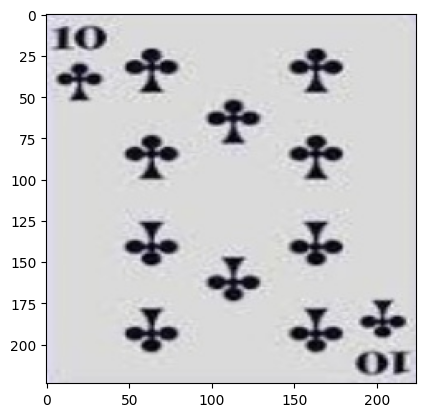


Showing the data shape: 
(224, 224, 3)

Showing the label:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt

index = 6
print("Printing the Image of Index {} for current batch.".format(index))
print("Showing the image: ")
plt.imshow(data_batch_check[index])
plt.show()

print("\nShowing the data shape: ")
print(data_batch_check[index].shape)

print("\nShowing the label:")
print(labels_batch_check[index])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

In [ ]:


# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization

model.add(Dense(53, activation='softmax')) 



In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    epochs=10,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 32
)

Epoch 1/10
238/238 [==============================] - 265s 1s/step - loss: 3.6907 - accuracy: 0.0965 - val_loss: 2.7550 - val_accuracy: 0.3359
Epoch 2/10
238/238 [==============================] - 255s 1s/step - loss: 2.9530 - accuracy: 0.2414 - val_loss: 2.0196 - val_accuracy: 0.4688
Epoch 3/10
238/238 [==============================] - 254s 1s/step - loss: 2.5587 - accuracy: 0.3381 - val_loss: 1.6282 - val_accuracy: 0.5781
Epoch 4/10
238/238 [==============================] - 253s 1s/step - loss: 2.2697 - accuracy: 0.4062 - val_loss: 1.4757 - val_accuracy: 0.6250
Epoch 5/10
238/238 [==============================] - 262s 1s/step - loss: 2.0142 - accuracy: 0.4688 - val_loss: 1.3267 - val_accuracy: 0.6406
Epoch 6/10
238/238 [==============================] - 258s 1s/step - loss: 1.8099 - accuracy: 0.5150 - val_loss: 1.2271 - val_accuracy: 0.6523
Epoch 7/10
238/238 [==============================] - 260s 1s/step - loss: 1.5756 - accuracy: 0.5717 - val_loss: 1.1643 - val_accuracy: 0.6953

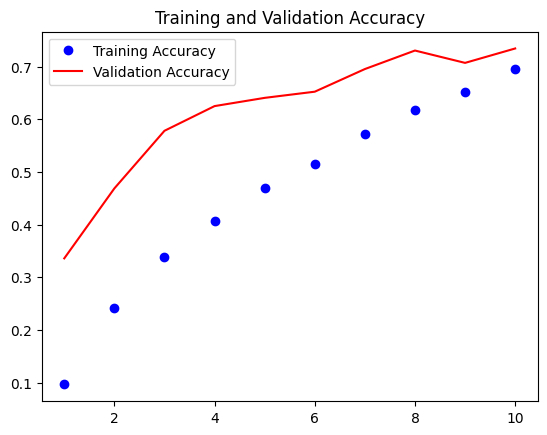

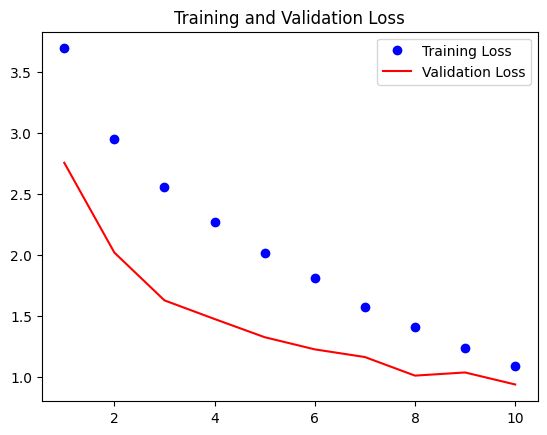

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_d,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
evaluation = model.evaluate(
    test_generator,
    steps=test_generator.samples // 32  
)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 265 images belonging to 53 classes.


8/8 [==============================] - 2s 260ms/step - loss: 1.0918 - accuracy: 0.7617
Test Loss: 1.0918259620666504
Test Accuracy: 0.76171875


In [ ]:
model.save('card_classifier_1.h5')

C:\Users\River\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
from pathlib import Path


file_paths = list(Path(test_d).rglob('*/*.jpg'))

class_labels = [os.path.split(os.path.split(path)[0])[1] for path in file_paths]

# Display the first few class labels
print(class_labels[:10])

NameError: name 'test_d' is not defined

In [ ]:
unique_class_labels = list(set(class_labels))

label_to_index = {label: index for index, label in enumerate(unique_class_labels)}
index_to_label = {index: label for index, label in enumerate(unique_class_labels)}


In [ ]:
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)


In [ ]:

numerical_labels = [label_to_index[label] for label in class_labels]

original_labels = [index_to_label[index] for index in numerical_labels]


In [ ]:

# Convert numerical predicted labels to original labels
original_pred_labels = [index_to_label[index] for index in pred_labels]



# Display 24 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df), 24)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    idx = random_index[i]
    ax.imshow(plt.imread(test_df.Filepath.iloc[idx]))
    
    true_label = test_df.Label.iloc[idx]
    pred_label = original_pred_labels[idx] if idx < len(original_pred_labels) else "N/A"
    
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"True: {true_label}\nPredicted: {pred_label}", color=color)

plt.tight_layout()
plt.show()
